In [1]:
%matplotlib inline
import numpy as np
import os
os.chdir('../../util/')
from bern_beta import bern_beta

/opt/anaconda3/lib/python3.8/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


**Exercise 12.1. [Purpose: To make sure you understand the Bayes' factors regarding a single coin in Figure 12.3 and Equation 12.4, including the Savage-Dickey method.]** Find the file BernBeta.R in the programs that accompany this book. Open RStudio with the folder of that file as R's working directory. Source the file so that R knows about the function `BernBeta`:

```
source("BernBeta.R")
```

Now, suppose we have a coin that is flipped 24 times and shows 7 heads. Enter the data into R, like this:

```
z=7 ; N=24
```

**(A)** According to the spike null hypothesis, for which the only credible value of $\theta$ is 0.5, what is the probability of the data? *Hint:* It is $\theta^z (1-\theta)^{(N-z)}$. Compute the value.

In [2]:
z = 7
N = 24
theta = 0.5

p = theta ** z * (1 - theta)**(N-z)

print(p)

5.960464477539063e-08


**(B)** Verify the result of the previous part by approximating a spike prior with a narrow beta distribution. Use the `BernBeta` function with a $beta(\theta|2000, 2000)$ prior, like this:

```
a=2000 ; b=2000
openGraph(widht=5,height=7)
BernBeta( c(a,b) , c(rep(0,N-z), rep(1,z)) , ROPE=c(0.48,0.52) ,
          plotType="Bars" , showCentTend="Mode" , showHDI=TRUE , showpD = TRUE )
```

Include the resulting graph in your report. What is the value of $p(D)$ for this prior? Is it very close to the value computed from the exact spike prior in the previous part of the exercise? (It should be.) Explain why they are not exactly equal. 

p(D) = 6.016980469645256e-08


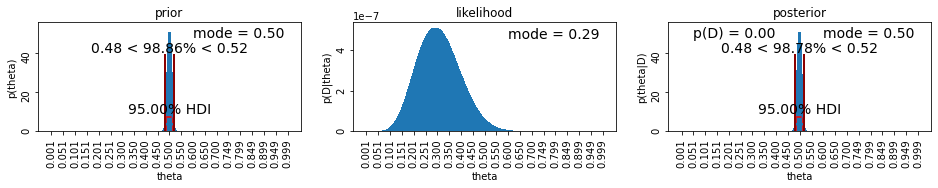

In [3]:
_ = bern_beta([2000, 2000], 
              np.hstack((np.repeat(0, N - z), np.repeat(1, z))),
              rope = [0.48, 0.52],
              plot_type = 'bars',
              show_cent_tend = 'mode', 
              show_hdi = True,
              show_pd = True)

It is very similar, but not exactly the same because within `bern_beta` we take into account our prior distribution (the shape parameters `a` and `b`) to calculate the probability of the data, whereas in the first part of this exercise we didn't. 

**(C)** Show the result when using a nearly Haldane prior, like this:

```
a=0.01 ; b=0.01
openGraph(widht=5,height=7)
BernBeta( c(a,b) , c(rep(0,N-z), rep(1,z)) , ROPE=c(0.48,0.52) ,
          plotType="Bars" , showCentTend="Mode" , showHDI=TRUE , showpD = TRUE )
```

Include the resulting graph in your report. What is the value of $p(D)$ for this prior? Compute and report the Bayes' factor of this prior relative to the spike (null) prior, using the formula $p(D|\text{Haldane})/p(D|\text{Null})$.

p(D) = 2.8667242516097823e-09


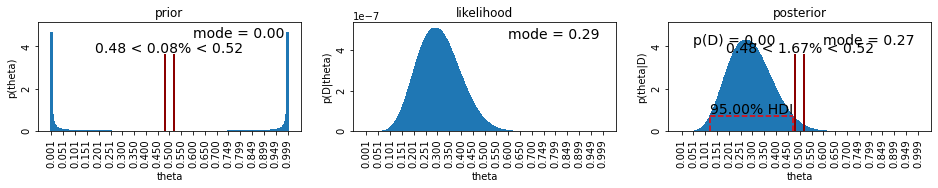

In [4]:
_ = bern_beta([0.01, 0.01], 
              np.hstack((np.repeat(0, N - z), np.repeat(1, z))),
              rope = [0.48, 0.52],
              plot_type = 'bars',
              show_cent_tend = 'mode', 
              show_hdi = True,
              show_pd = True)

In [5]:
p_d_null = 6.016980469645256e-08
p_d_haldane = 2.8667242516097823e-09
p_d_haldane / p_d_null

0.04764390155613712

**(D)** Continuing with the Haldane prior from the previous part, compute the approximate Bayes' factor using the Savage-Dickey method. That is, compute and report the ratio of percentage of prior within the ROPE over percentage of posterior within the ROPE

In [6]:
0.08 / 1.67

0.04790419161676647

**(E)** Suppose we have previous knowledge that in this application there tend to be more tails than heads. Show the result when using a mildly informed prior, like this:

```
a=2 ; b=4
openGraph(widht=5,height=7)
BernBeta( c(a,b) , c(rep(0,N-z), rep(1,z)) , ROPE=c(0.48,0.52) ,
          plotType="Bars" , showCentTend="Mode" , showHDI=TRUE , showpD = TRUE )
```

Include the resulting graph in your report. What is the value of $p(D)$ for this prior? Compute and report the Bayes' factor of this prior relative to the spike (null) prior, using the formula $p(D|\text{Informed})/p(D|\text{Null})$.

p(D) = 2.2188927736154117e-07


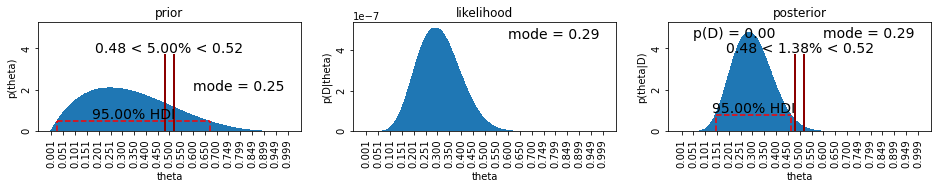

In [7]:
_ = bern_beta([2, 4], 
              np.hstack((np.repeat(0, N - z), np.repeat(1, z))),
              rope = [0.48, 0.52],
              plot_type = 'bars',
              show_cent_tend = 'mode', 
              show_hdi = True,
              show_pd = True)

In [8]:
p_d_informed = 2.2188927736154117e-07
p_d_informed / p_d_null

3.6877180918392303

**(F)** Continuing with the mildly informed prior from the previous part, compute the approximate Bayes' factor using the Savage-Dickey method. That is, compute and report the ratio of percentage of prior within the ROPE over percentage of posterior within the ROPE

In [9]:
5 / 1.38

3.6231884057971016

**(G)** Report the 95% HDIs when starting with the Haldane and the mildly informed prior. Are the HDIs very different? Were the Bayes' factors very different?

The prior's 95% HDI for the mildly informed case is much higher than that of the Haldane case, and so is the Bayes factor as well. 

**(H)** Which approach, model comparison or estimation, seems most informative? Why? Within the model-comparison approach, which prior, uninformed Haldane or mildly informed, seems most meaningful? Why?

The model comparison approach is only givin as a point estimate of which two hypothesis best fits the observed data, whereas the estimation approach gives as the estimation approach, even though can use the ROPE to answer yes/no, is also providing us with information about the relative likelihood of the different posterior values.

When comparing the Haldane and the informed priors, it seems that the informed is more meaningful because its posterior is narrower. 